# New section

* **NAME:** *SUPRATIM MUKHERJEE*
* **ROLL:** *002211001101*
* **YEAR:** *4TH*
* **GROUP:** *A2*
* **SUBJECT:** *MACHINE LEARNING LAB*
* *ASSIGNMENT-II*

1A i. SVM classifier (Linear) - Wine dataset

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

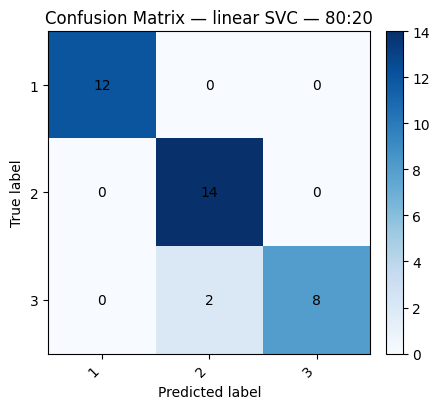

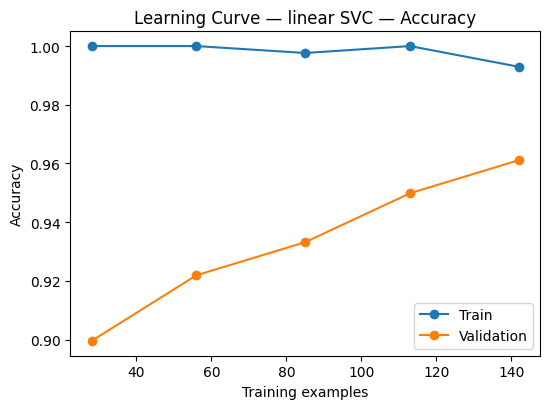

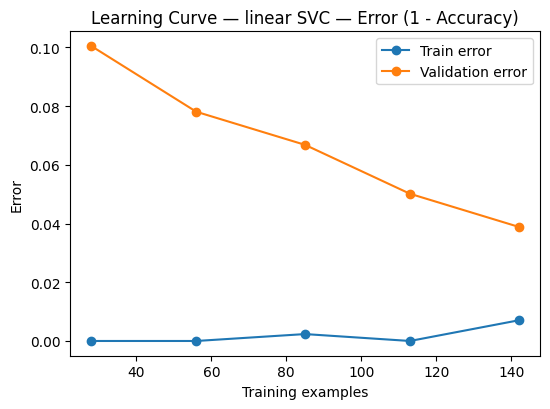

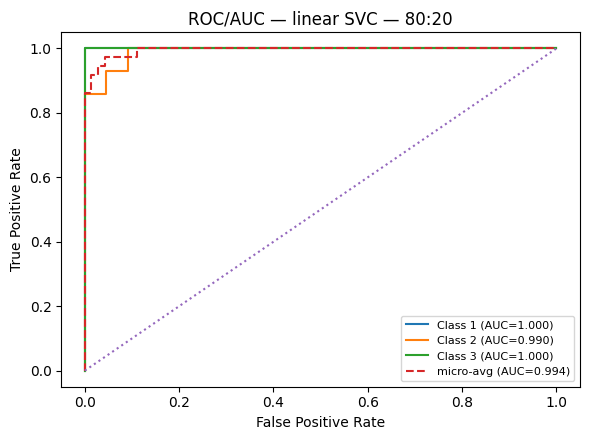

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.svm import SVC
#classifier = SVC(kernel="linear")
classifier = SVC(C=1.0, kernel="linear", degree=3, gamma='scale', coef0=0.0,
                 shrinking=True, probability=False, tol=0.001, cache_size=200,
                 class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=None)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

############################################

import numpy as np

classes_in_y = np.unique(y)
print("Classes present in y:", classes_in_y)

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)


def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_1A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_1A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)
    y_score = ovr.decision_function(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)

plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — linear SVC — 80:20",
    save_path="cm_linear_80_20_1A.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — linear SVC",
    save_prefix="linear_svc")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — linear SVC — 80:20",
    save_path="roc_linear_80_20_1A.png")



1A ii. SVM classifier with PCA (Linear) - Wine dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=42).fit(X_train_s)
X_train_pca = pca.transform(X_train_s)
X_test_pca  = pca.transform(X_test_s)

print(f"PCA kept {pca.n_components_} components "
      f"(≈{pca.explained_variance_ratio_.sum():.3f} variance)")

from sklearn.svm import SVC
#classifier = SVC(kernel="linear")
classifier = SVC(C=1.0, kernel="linear", degree=3, gamma='scale', coef0=0.0,
                 shrinking=True, probability=False, tol=0.001, cache_size=200,
                 class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=42)

classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

1B i. SVM classifier (Linear) - Handwritten Digits Dataset

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

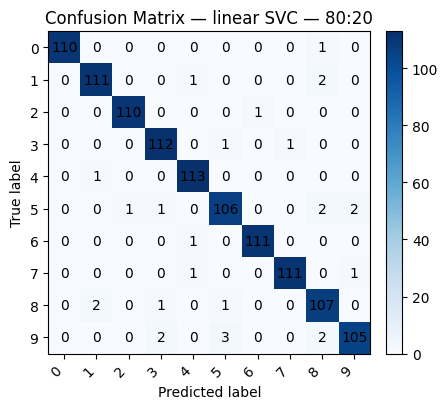

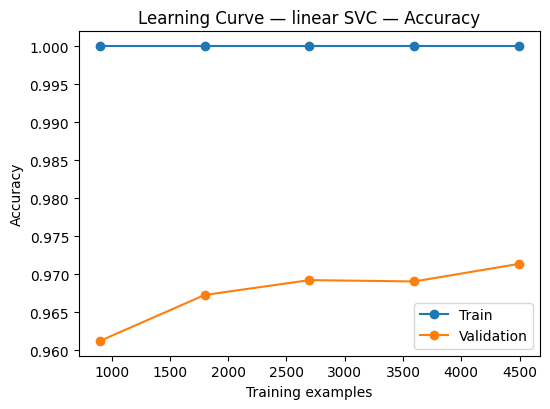

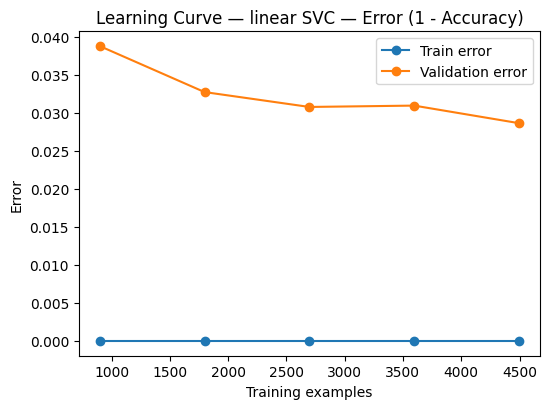

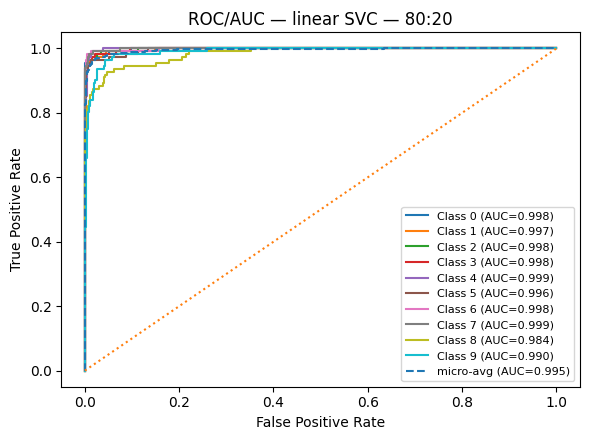

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.svm import SVC
#classifier = SVC(kernel="linear")
classifier = SVC(C=1.0, kernel="linear", degree=3, gamma='scale', coef0=0.0,
                 shrinking=True, probability=False, tol=0.001, cache_size=200,
                 class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=None)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

############################################

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)

def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_1B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_1B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)
    y_score = ovr.decision_function(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)

plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — linear SVC — 80:20",
    save_path="cm_linear_80_20_1B.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — linear SVC",
    save_prefix="linear_svc")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — linear SVC — 80:20",
    save_path="roc_linear_80_20_1B.png")

1B ii. SVM classifier with PCA(Linear) - Handwritten Digits Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -q ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=42).fit(X_train_s)
X_train_pca = pca.transform(X_train_s)
X_test_pca  = pca.transform(X_test_s)

print(f"PCA kept {pca.n_components_} components "
      f"(≈ {pca.explained_variance_ratio_.sum():.3f} variance)")

from sklearn.svm import SVC
#classifier = SVC(kernel="linear")
classifier = SVC(C=1.0, kernel="linear", degree=3, gamma='scale', coef0=0.0,
                 shrinking=True, probability=False, tol=0.001, cache_size=200,
                 class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=None)

classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

2A i. SVM classifier (Polynomial) - Wine Dataset

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

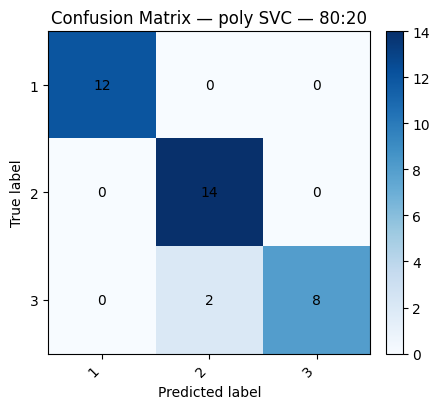

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

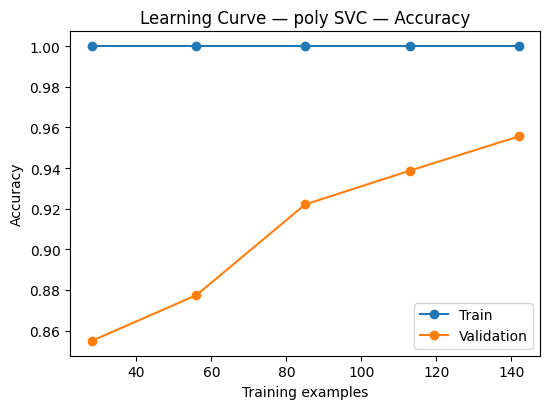

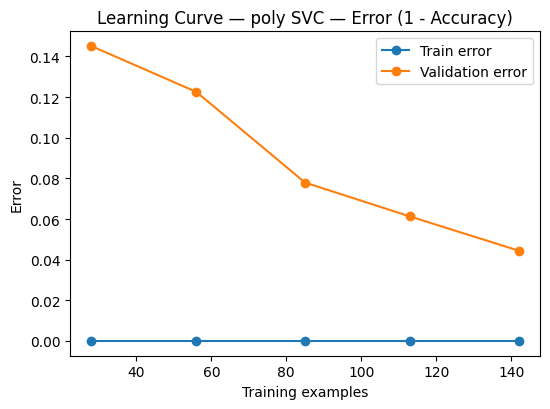

[LibSVM][LibSVM][LibSVM]

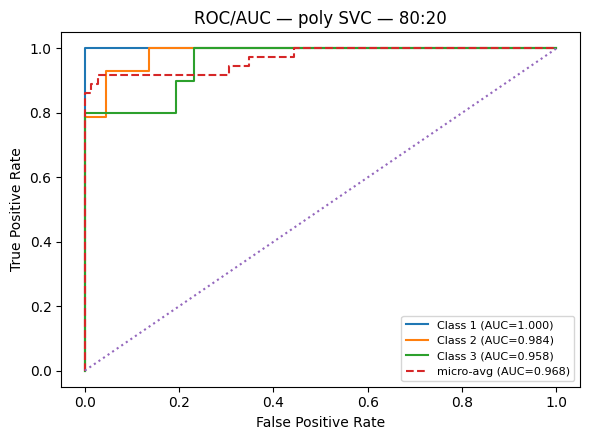

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.svm import SVC
#classifier = SVC(kernel="poly", degree=3)
classifier = SVC(C=10.0, kernel="poly", degree=5, gamma=1.0, coef0=1.0,
                 shrinking=True, probability=True, tol=0.001, cache_size=100,
                 class_weight='balanced', verbose=True, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=None)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

############################################

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)

def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_2A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_2A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)
    y_score = ovr.decision_function(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)

plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — poly SVC — 80:20",
    save_path="cm_poly_80_20_2A.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — poly SVC",
    save_prefix="linear_svc")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — poly SVC — 80:20",
    save_path="roc_poly_80_20_2A.png")

2A ii. SVM classifier with PCA(Polynomial) - Wine Dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -q ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)


pca = PCA(n_components=0.95, random_state=42).fit(X_train_s)
X_train_pca = pca.transform(X_train_s)
X_test_pca  = pca.transform(X_test_s)

print(f"PCA kept {pca.n_components_} components "
      f"(≈ {pca.explained_variance_ratio_.sum():.3f} variance)")

from sklearn.svm import SVC
#classifier = SVC(kernel="poly", degree=3)
classifier = SVC(C=10.0, kernel="poly", degree=5, gamma=1.0, coef0=1.0,
                 shrinking=True, probability=True, tol=0.001, cache_size=100,
                 class_weight='balanced', verbose=True, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=None)

classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

2B i. SVM classifier (Polynomial) - Handwritten Digits Dataset

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

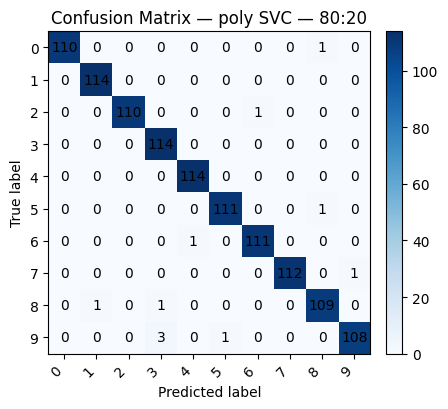

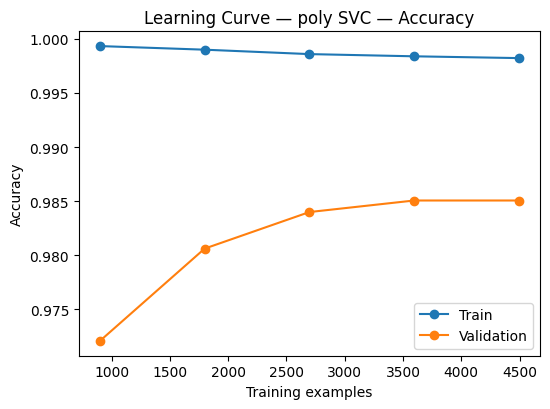

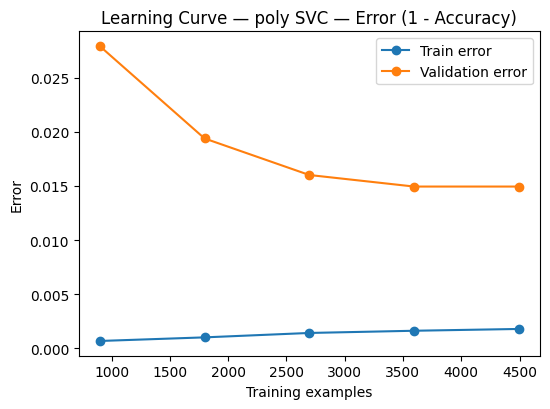

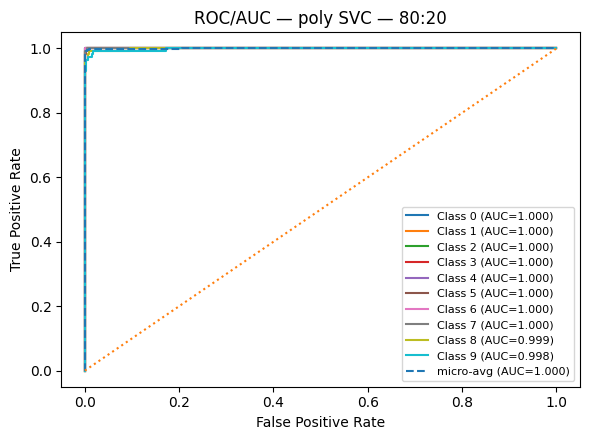

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.svm import SVC
#classifier = SVC(kernel="poly", degree=3)
classifier = SVC(C=1.0, kernel="poly", degree=3, gamma='scale', coef0=0.0,
                 shrinking=True, probability=False, tol=0.001, cache_size=200,
                 class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=None)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

############################################

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)


def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_2B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_2B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)
    y_score = ovr.decision_function(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)

plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — poly SVC — 80:20",
    save_path="cm_poly_80_20_2B.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — poly SVC",
    save_prefix="poly_svc")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — poly SVC — 80:20",
    save_path="roc_poly_80_20_2B.png")

2B ii. SVM classifier with PCA(Polynomial) - Handwritten Digits Dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -q ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=42).fit(X_train_s)
X_train_pca = pca.transform(X_train_s)
X_test_pca  = pca.transform(X_test_s)

print(f"PCA kept {pca.n_components_} components "
      f"(≈ {pca.explained_variance_ratio_.sum():.3f} variance)")

from sklearn.svm import SVC
#classifier = SVC(kernel="poly", degree=3)
classifier = SVC(C=1.0, kernel="poly", degree=3, gamma='scale', coef0=0.0,
                 shrinking=True, probability=False, tol=0.001, cache_size=200,
                 class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=None)

classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

3A i. SVM classifier (Gaussian) - Wine Dataset

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

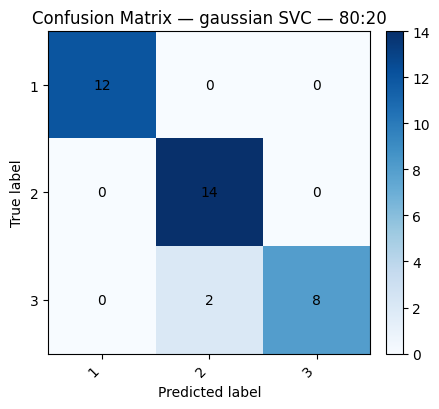

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


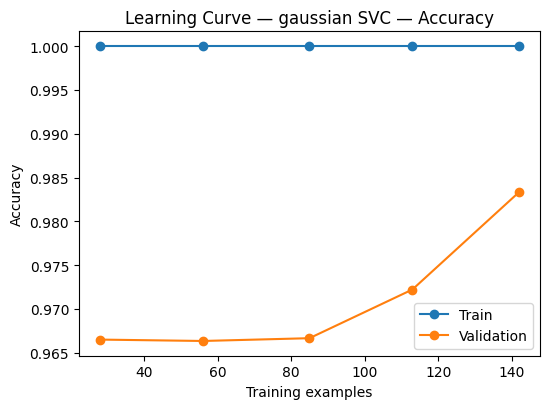

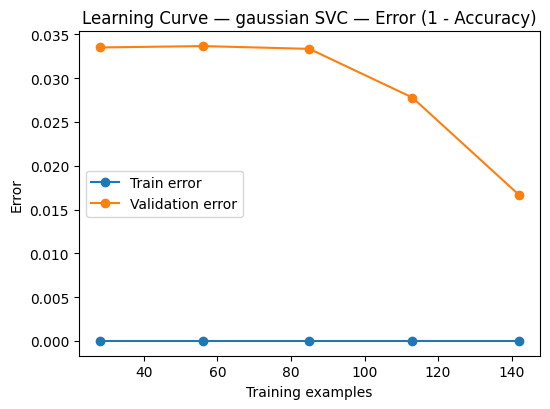

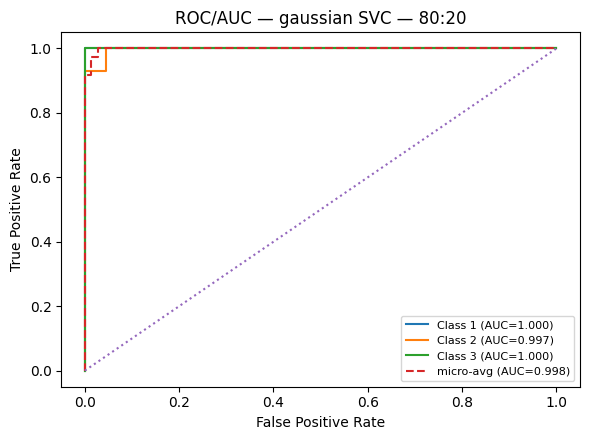

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.svm import SVC
#classifier = SVC(kernel="rbf")

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=100.0, kernel="rbf", degree=3, gamma=0.001, coef0=0.0,
                 shrinking=True, probability=True, tol=0.001, cache_size=100,
                 class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=None))
])

param_distributions = {
    'svm__C': uniform(0.1, 100),
    'svm__gamma': uniform(0.0001, 1)
}

classifier = RandomizedSearchCV(pipeline, param_distributions,n_iter=50,
                                scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

############################################

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)


def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_3A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_3A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)
    y_score = ovr.decision_function(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)

plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — gaussian SVC — 80:20",
    save_path="cm_gaussian_80_20_3A.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — gaussian SVC",
    save_prefix="gaussian_svc")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — gaussian SVC — 80:20",
    save_path="roc_gaussian_80_20_3A.png")

3A ii. SVM classifier with PCA(Gaussian) - Wine Dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -q ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import uniform

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('svm', SVC(C=100.0, kernel="rbf", degree=3, gamma=0.001, coef0=0.0,
                shrinking=True, probability=True, tol=0.001, cache_size=100,
                class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr',
                break_ties=False, random_state=None))
])

param_distributions = {
    'svm__C': uniform(0.1, 100),
    'svm__gamma': uniform(0.0001, 1)
}

classifier = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix
print("Best params:", classifier.best_params_)
print("Best CV accuracy:", classifier.best_score_)

best_pca = classifier.best_estimator_.named_steps['pca']
print(f"PCA kept {best_pca.n_components_} components "
      f"(≈ {best_pca.explained_variance_ratio_.sum():.3f} variance)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

3B i. SVM classifier (Gaussian) - Handwritten Digits Dataset

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

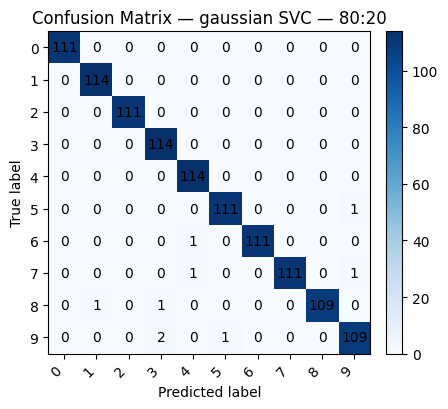

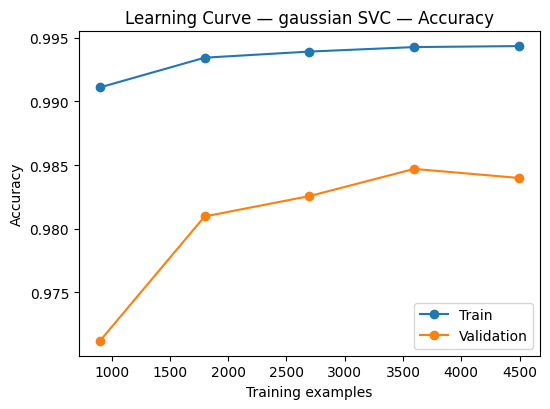

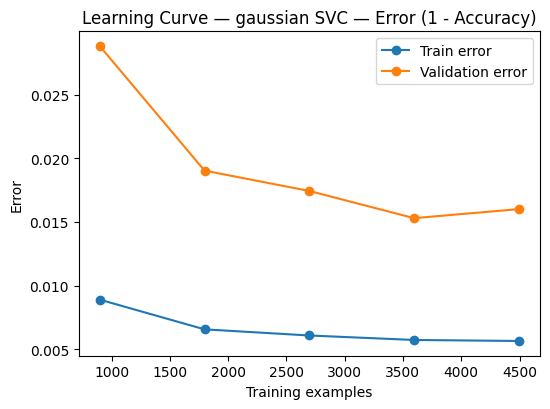

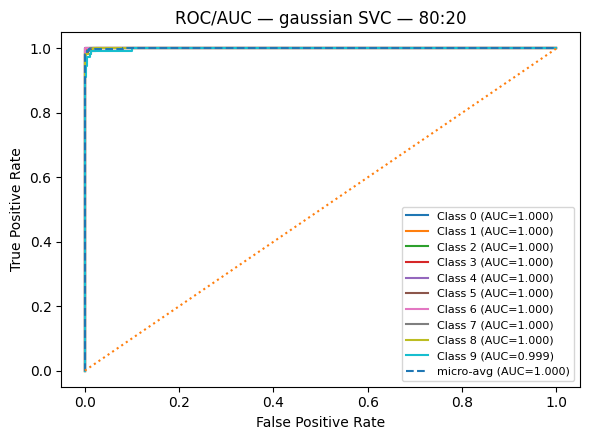

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.svm import SVC
#classifier = SVC(kernel="rbf")
classifier = SVC(C=1.0, kernel="rbf", degree=3, gamma='scale', coef0=0.0,
                 shrinking=True, probability=False, tol=0.001, cache_size=200,
                 class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=None)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

############################################

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)


def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_3B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_3B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)
    y_score = ovr.decision_function(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)

plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — gaussian SVC — 80:20",
    save_path="cm_gaussian_80_20_3B.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — gaussian SVC",
    save_prefix="gaussian_svc")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — gaussian SVC — 80:20",
    save_path="roc_gaussian_80_20_3B.png")

3B ii. SVM classifier with PCA(Gaussian) - Handwritten Digits Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -q ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

classifier = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("svm", SVC(C=1.0, kernel="rbf", degree=3, gamma='scale', coef0=0.0,
                shrinking=True, probability=False, tol=0.001, cache_size=200,
                class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                break_ties=False, random_state=None))
])

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

pca_steps = classifier.named_steps["pca"]
print(f"PCA kept {pca_steps.n_components_} components (≈ {pca_steps.explained_variance_ratio_.sum():.3f} variance)")

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

4A i. SVM classifier (Sigmoid) - Wine Dataset

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

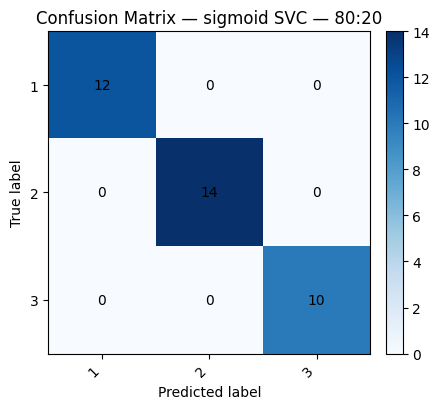

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


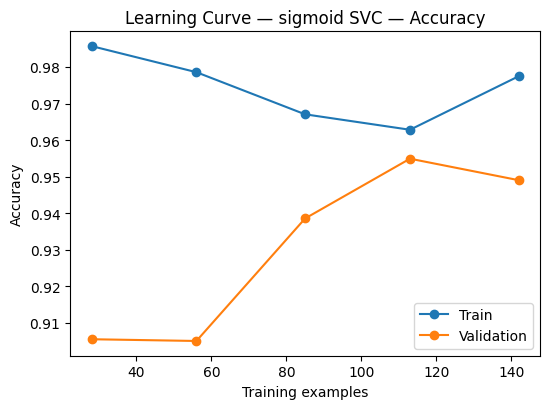

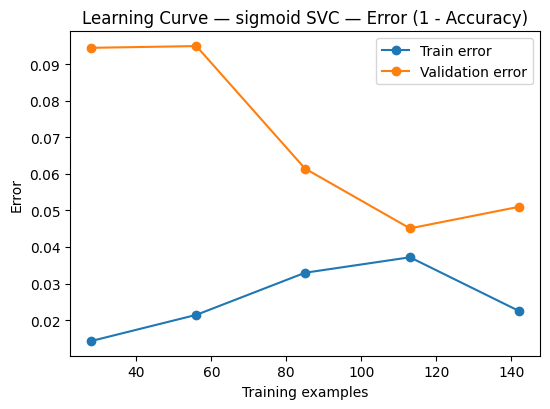

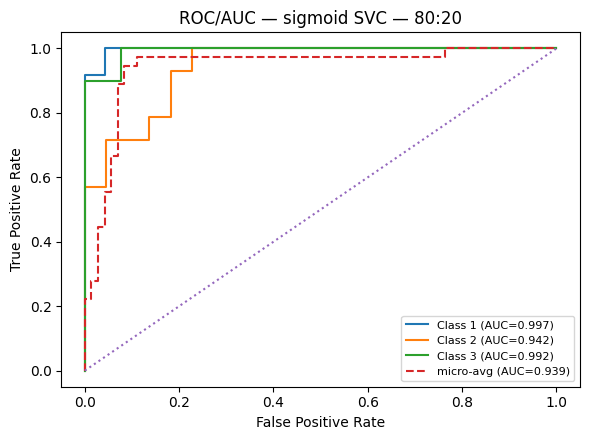

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.svm import SVC
#classifier = SVC(kernel="sigmoid")

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=1.0, kernel="sigmoid", degree=3, gamma='scale', coef0=0.0,
                 shrinking=True, probability=False, tol=0.001, cache_size=200,
                 class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=None))
])

param_distributions = {
    'svm__C': uniform(0.01, 100),
    'svm__gamma': uniform(0.001, 1),
    'svm__coef0': uniform(-1.0,5.0)
}
classifier = RandomizedSearchCV(pipeline, param_distributions,n_iter=50,
                                scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

############################################

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)


def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_4A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_4A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)
    y_score = ovr.decision_function(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)

plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — sigmoid SVC — 80:20",
    save_path="cm_sigmoid_80_20_4A.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — sigmoid SVC",
    save_prefix="sigmoid_svc")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — sigmoid SVC — 80:20",
    save_path="roc_sigmoid_80_20_4A.png")

4A ii. SVM classifier with PCA(Sigmoid) - Wine Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -q ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import uniform

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('svm', SVC(C=1.0, kernel="sigmoid", degree=3, gamma='scale', coef0=0.0,
                shrinking=True, probability=False, tol=0.001, cache_size=200,
                class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                break_ties=False, random_state=None))
])

param_distributions = {
    'svm__C': uniform(0.01, 100),
    'svm__gamma': uniform(0.001, 1),
    'svm__coef0': uniform(-1.0, 5.0),
}

classifier = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Best params:", classifier.best_params_)
print("Best CV accuracy:", classifier.best_score_)

best_pca = classifier.best_estimator_.named_steps['pca']
print(f"PCA kept {best_pca.n_components_} components "
      f"(≈ {best_pca.explained_variance_ratio_.sum():.3f} variance)")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

4B i. SVM classifier (Sigmoid) - Handwritten Digits Dataset

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

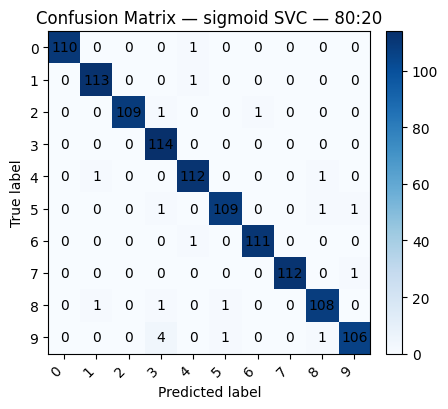

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.svm import SVC
#classifier = SVC(kernel="sigmoid")

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=100.0, kernel="sigmoid", degree=3, gamma='scale', coef0=0.5,
                 shrinking=True, probability=False, tol=0.001, cache_size=200,
                 class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                 break_ties=False, random_state=None))
])

param_grid = {
    'svm__C': [0.1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1],
    'svm__coef0': [0.0, 0.5, 1.0]
}

classifier = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

############################################

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)


def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_4B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_4B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)
    y_score = ovr.decision_function(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)

plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — sigmoid SVC — 80:20",
    save_path="cm_sigmoid_80_20_4B.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — sigmoid SVC",
    save_prefix="sigmoid_svc")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — sigmoid SVC — 80:20",
    save_path="roc_sigmoid_80_20_4B.png")

4B ii. SVM classifier with PCA(Sigmoid) - Handwritten Digits Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('svm', SVC(kernel="sigmoid", probability=False, decision_function_shape='ovr'))
])

param_grid = {
    'svm__C': [0.1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1],
    'svm__coef0': [0.0, 0.5, 1.0],
}

classifier = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Best params:", classifier.best_params_)
print("Best CV accuracy:", classifier.best_score_)

best_pca = classifier.best_estimator_.named_steps['pca']
print(f"PCA kept {best_pca.n_components_} components "
      f"(≈ {best_pca.explained_variance_ratio_.sum():.3f} variance)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nPerformance Evaluation:")
print(classification_report(y_test, y_pred))

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

5A i. MLP classifier - Wine Dataset

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


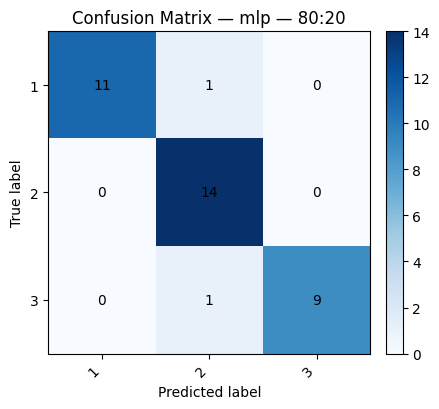

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

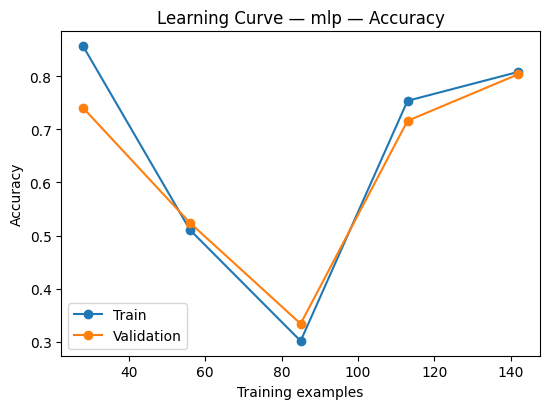

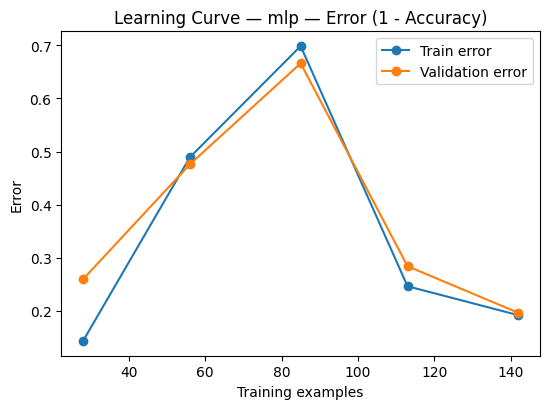

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


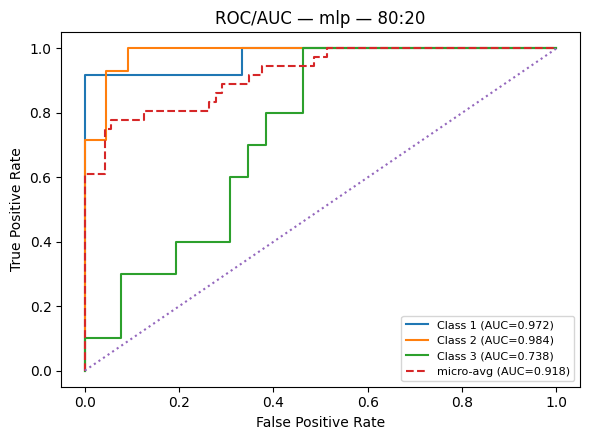

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.neural_network import MLPClassifier
#classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
classifier = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam',
                            alpha=0.0001, batch_size='auto', learning_rate='constant',
                            learning_rate_init=0.001, power_t=0.5, max_iter=200,
                            shuffle=True, random_state=None, tol=0.0001, verbose=False,
                            warm_start=False, momentum=0.9, nesterovs_momentum=True,
                            early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                            beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

############################################

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)


def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_5A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_5A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)

    y_score = ovr.predict_proba(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title or "ROC/AUC — MLP")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)

plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — mlp — 80:20",
    save_path="cm_mlp_80_20_5A.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — mlp",
    save_prefix="mlp_svc")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — mlp — 80:20",
    save_path="roc_mlp_80_20_5A.png")

5A ii. MLP classifier with PCA- Wine Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=100, activation='relu', solver='adam',
        alpha=0.0001, batch_size='auto', learning_rate='constant',
        learning_rate_init=0.001, power_t=0.5, max_iter=200,
        shuffle=True, random_state=42, tol=0.0001, verbose=False,
        warm_start=False, momentum=0.9, nesterovs_momentum=True,
        early_stopping=False, validation_fraction=0.1, beta_1=0.9,
        beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000
    ))
])

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

pca_step = classifier.named_steps["pca"]
print(f"PCA kept {pca_step.n_components_} components (≈ {pca_step.explained_variance_ratio_.sum():.3f} variance)")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


5B i. MLP classifier - Handwritten Digits Dataset

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

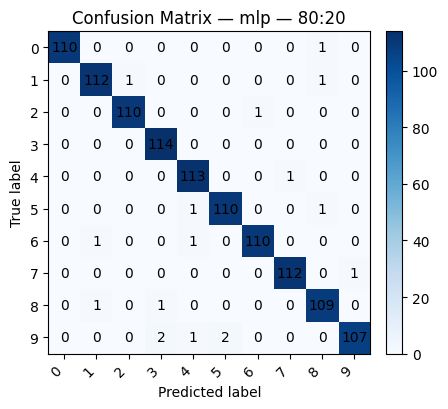

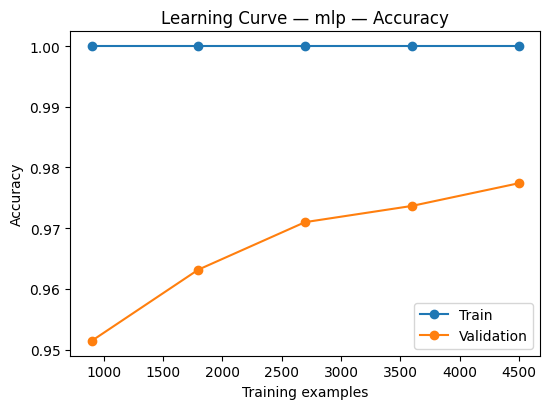

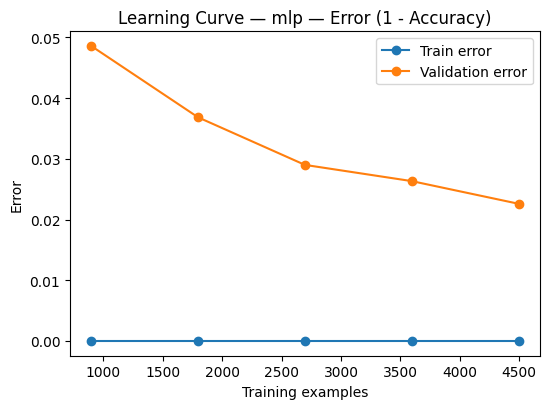

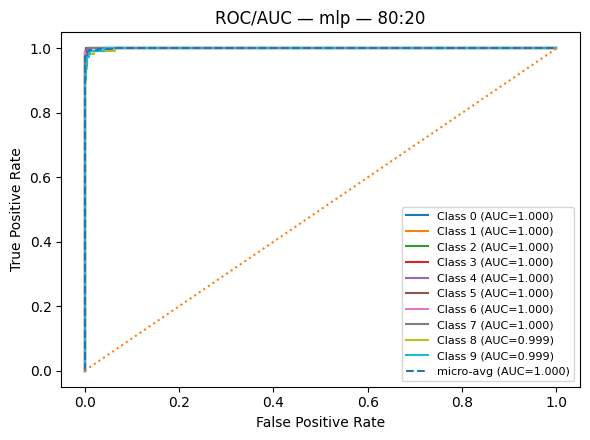

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.neural_network import MLPClassifier
#classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
classifier = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam',
                            alpha=0.0001, batch_size='auto', learning_rate='constant',
                            learning_rate_init=0.001, power_t=0.5, max_iter=200,
                            shuffle=True, random_state=None, tol=0.0001, verbose=False,
                            warm_start=False, momentum=0.9, nesterovs_momentum=True,
                            early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                            beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

############################################

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)


def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_5B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_5B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)

    # MLP uses predict_proba
    y_score = ovr.predict_proba(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title or "ROC/AUC — MLP")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)


plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — mlp — 80:20",
    save_path="cm_mlp_80_20_5B.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — mlp",
    save_prefix="mlp")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — mlp — 80:20",
    save_path="roc_mlp_80_20_5B.png")

5B ii. MLP classifier with PCA- Handwritten Digits Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -q ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}
for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

classifier = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=100, activation='relu', solver='adam',
        alpha=0.0001, batch_size='auto', learning_rate='constant',
        learning_rate_init=0.001, power_t=0.5, max_iter=200,
        shuffle=True, random_state=None, tol=0.0001, verbose=False,
        warm_start=False, momentum=0.9, nesterovs_momentum=True,
        early_stopping=False, validation_fraction=0.1, beta_1=0.9,
        beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000
    ))
])

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

pca_step = classifier.named_steps["pca"]
print(f"PCA kept {pca_step.n_components_} components (≈ {pca_step.explained_variance_ratio_.sum():.3f} variance)")

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

6A i. Random Forest classifier - Wine Dataset

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

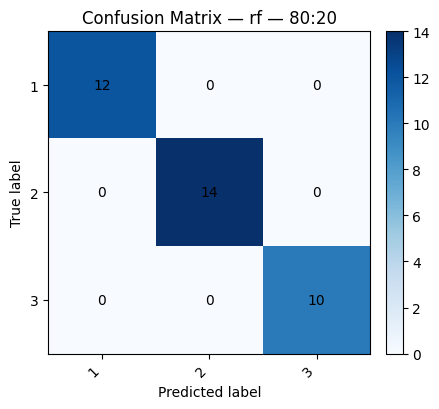

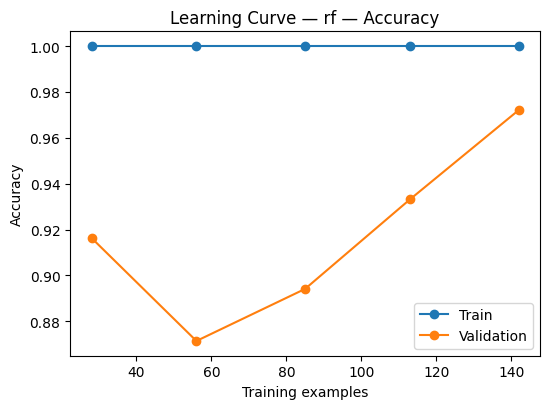

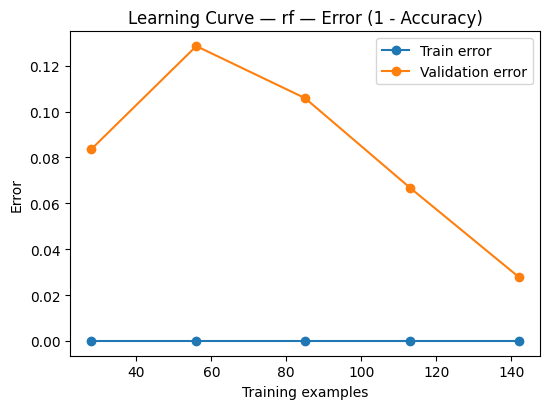

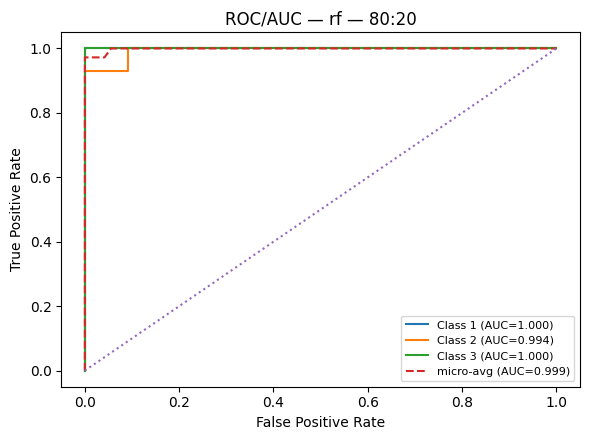

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

#classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                                    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                    max_features=0.8, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                    bootstrap=True, oob_score=False, n_jobs=None,
                                    random_state=None, verbose=0, warm_start=False, class_weight=None,
                                    ccp_alpha=0.0, max_samples=None)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Accuracy:")
print(accuracy_score(y_test, y_pred))

############################################

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)


def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_6A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_6A.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)

    y_score = ovr.predict_proba(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title or "ROC/AUC — Random Forest")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)


plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — rf — 80:20",
    save_path="cm_rf_80_20_6A.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — rf",
    save_prefix="rf")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — rf — 80:20",
    save_path="roc_rf_80_20_6A.png")

6A ii. Random Forest classifier with PCA- Wine Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -q ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

y = np.ravel(y)

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

from sklearn.model_selection import train_test_split

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}
for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classifier = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("rf", RandomForestClassifier(
        n_estimators=100, criterion='gini', max_depth=None,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
        max_features=0.8, max_leaf_nodes=None, min_impurity_decrease=0.0,
        bootstrap=True, oob_score=False, n_jobs=None,
        random_state=None, verbose=0, warm_start=False, class_weight=None,
        ccp_alpha=0.0, max_samples=None
    ))
])

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

pca_step = classifier.named_steps["pca"]
print(f"PCA kept {pca_step.n_components_} components (≈ {pca_step.explained_variance_ratio_.sum():.3f} variance)")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Accuracy:")
print(accuracy_score(y_test, y_pred))

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

6B i. Random Forest classifier - Handwritten Digits Dataset

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

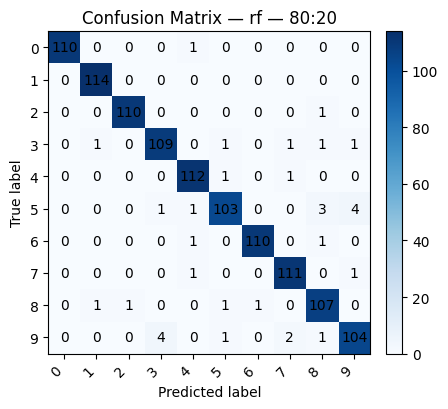

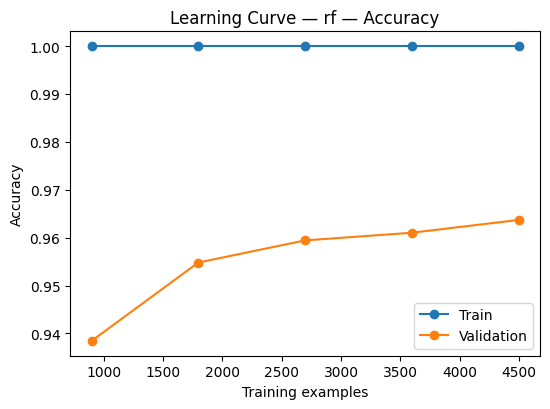

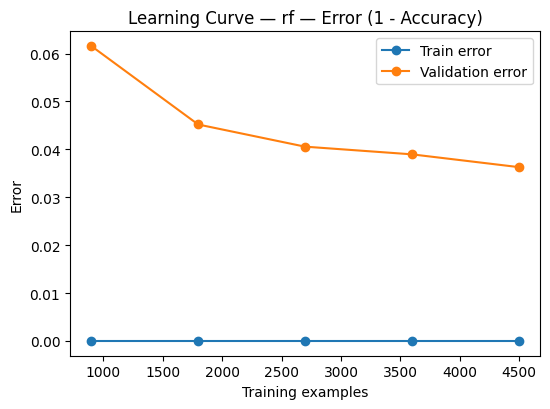

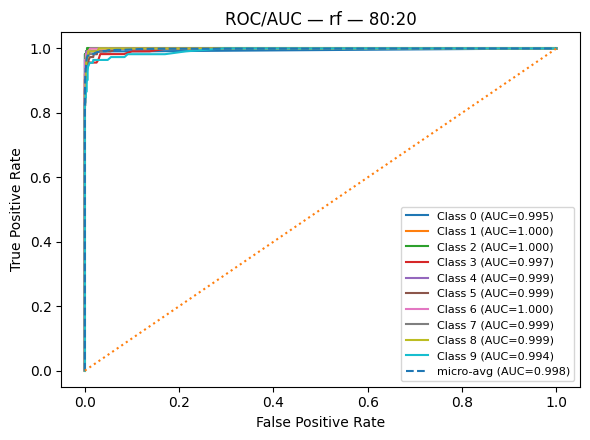

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

#classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                                    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                    max_features=0.8, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                    bootstrap=True, oob_score=False, n_jobs=None,
                                    random_state=None, verbose=0, warm_start=False, class_weight=None,
                                    ccp_alpha=0.0, max_samples=None)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("------------------------------")

print("Accuracy:")
print(accuracy_score(y_test, y_pred))

############################################

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y = np.ravel(y)
class_names = [str(c) for c in np.unique(y)]


def plot_confusion_heatmap(y_true, y_pred, class_names=None, title="", save_path=None):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    labels = np.unique(np.concatenate([np.ravel(y_true), np.ravel(y_pred)]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if class_names is not None and len(class_names) == len(labels):
        tick_labels = class_names
    else:
        tick_labels = labels

    fig = plt.figure(figsize=(4.8, 4.2))
    ax = plt.gca()
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    k = len(labels)
    ax.set_xticks(np.arange(k)); ax.set_xticklabels(tick_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(k)); ax.set_yticklabels(tick_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center")

    ax.set_ylabel("True label"); ax.set_xlabel("Predicted label")
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)


def plot_learning_and_error_curves(estimator, X, y, title_prefix="", save_prefix=None):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.2, 1.0, 5),
        shuffle=True, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)


    fig1 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, train_mean, marker="o", label="Train")
    plt.plot(train_sizes, val_mean,   marker="o", label="Validation")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig1.savefig(f"{save_prefix}_learning_accuracy_6B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig1)


    fig2 = plt.figure(figsize=(5.6, 4.2))
    plt.plot(train_sizes, 1-train_mean, marker="o", label="Train error")
    plt.plot(train_sizes, 1-val_mean,   marker="o", label="Validation error")
    plt.title(f"{title_prefix} — Error (1 - Accuracy)")
    plt.xlabel("Training examples"); plt.ylabel("Error"); plt.legend()
    plt.tight_layout()
    if save_prefix:
        fig2.savefig(f"{save_prefix}_learning_error_6B.png", dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig2)

def plot_multiclass_roc_ovr(base_estimator, X_train, X_test, y_train, y_test,
                            classes, title="", save_path=None):
    y_train_bin = label_binarize(y_train, classes=classes)
    y_test_bin  = label_binarize(y_test,  classes=classes)

    ovr = OneVsRestClassifier(base_estimator)
    ovr.fit(X_train, y_train_bin)

    y_score = ovr.predict_proba(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig = plt.figure(figsize=(6, 4.5))
    for i, c in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {c} (AUC={roc_auc[i]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
             label=f"micro-avg (AUC={roc_auc['micro']:.3f})")
    plt.plot([0,1],[0,1], linestyle=":")
    plt.title(title or "ROC/AUC — Random Forest")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show(); plt.close(fig)


plot_confusion_heatmap(y_test, y_pred, class_names,
    title="Confusion Matrix — rf — 80:20",
    save_path="cm_linear_80_20_6B.png")

plot_learning_and_error_curves(classifier, X, y,
    title_prefix="Learning Curve — rf",
    save_prefix="rf")

plot_multiclass_roc_ovr(classifier, X_train, X_test, y_train, y_test,
    classes=np.unique(y),
    title="ROC/AUC — rf — 80:20",
    save_path="roc_rf_80_20_6B.png")

6B ii. Random Forest classifier with PCA- Handwritten Digits Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

y = np.ravel(y)

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

splits = {"50:50": 0.5, "60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    print(f"Training with split {split_name} (test_size={test_size})")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classifier = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("rf", RandomForestClassifier(
        n_estimators=100, criterion='gini', max_depth=None,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
        max_features=0.8, max_leaf_nodes=None, min_impurity_decrease=0.0,
        bootstrap=True, oob_score=False, n_jobs=None,
        random_state=None, verbose=0, warm_start=False, class_weight=None,
        ccp_alpha=0.0, max_samples=None
    ))
])

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

pca_step = classifier.named_steps["pca"]
print(f"PCA kept {pca_step.n_components_} components (≈ {pca_step.explained_variance_ratio_.sum():.3f} variance)")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Accuracy:")
print(accuracy_score(y_test, y_pred))

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

# Welcome to Colab!

## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code and audio.

**How to get started**
*  Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google Account.
*  <a href="https://aistudio.google.com/app/apikey">Create an API key</a>.
* Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a> or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.

**Discover Gemini's advanced capabilities**
*  Play with Gemini <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb">multimodal outputs</a>, mixing text and images in an iterative way.
*  Discover the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">multimodal Live API</a> &#40;demo <a href="https://aistudio.google.com/live">here</a>&#41;.
*  Learn how to <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb&quot;">analyse images and detect items in your pictures</a> using Gemini &#40;bonus, there's a <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">3D version</a> as well!&#41;.
*  Unlock the power of the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">Gemini thinking model</a>, capable of solving complex tasks with its inner thoughts.
      
**Explore complex use cases**
*  Use <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">Gemini grounding capabilities</a> to create a report on a company based on what the model can find on the Internet.
*  Extract <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">invoices and form data from PDFs</a> in a structured way.
*  Create <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">illustrations based on a whole book</a> using Gemini large context window and Imagen.

To learn more, take a look at the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.


Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  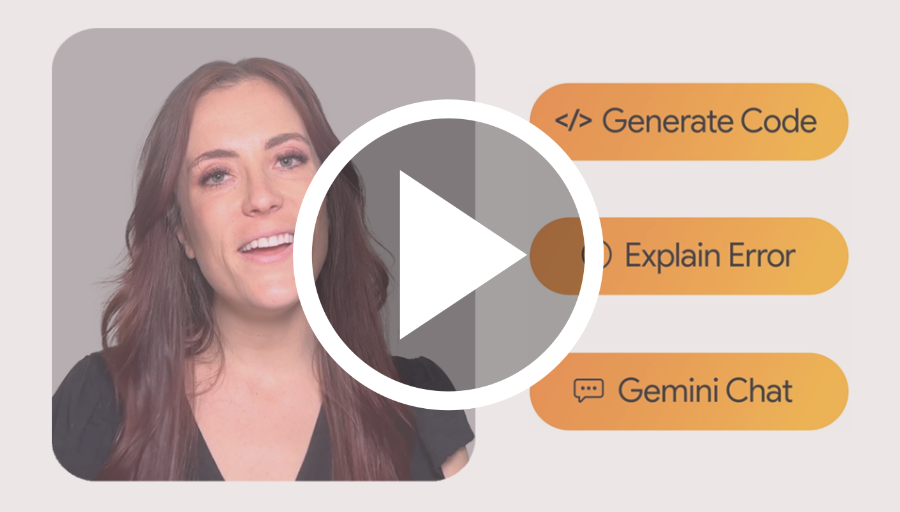
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> or <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y">Colab features you may have missed</a> to learn more or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

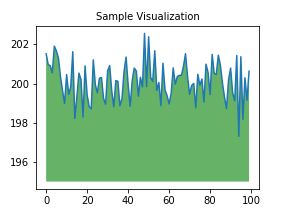

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning that you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for <strong>pandas</strong> code to finish running and want to go faster, you can switch to a GPU runtime and use libraries like <a href="https://rapids.ai/cudf-pandas">RAPIDS cuDF</a> that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">10-minute guide</a> or
 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">US stock market data analysis demo</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning

<div>

These are a few of the notebooks related to machine learning, including Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
